# DIABETES PREDICTION A - CLASSIFICATION PROBLEM

A structured process of solving the Diabetes Prediction Classification Problem using the `***OSEMN***` framework (Obtain, Scrub, Explore, Model, and Interpret). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier

from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler

import joblib

sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## OBTAIN: Data Acquisition
The dataset (diabetes.csv) is read and loaded into pandas DataFrame.

In [2]:
df = pd.read_csv('dataml\diabetes.csv')
df.head()

PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0    1354778            0            171                      80   
1    1147438            8             92                      93   
2    1640031            7            115                      47   
3    1883350            9            103                      78   
4    1424119            1             85                      59   

   TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0                34            23  43.509726          1.213191   21         0  
1                47            36  21.240576          0.158365   23         0  
2                52            35  41.511523          0.079019   23         0  
3                25           304  29.582192          1.282870   43         1  
4                27            35  42.604536          0.549542   22         0

### Overview of the dataset

In [3]:
df.shape

(15000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
df.columns

Index(['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')

## SCRUB: Data Cleaning 
To:
- Check for missing values.
- Remove irrelevant columns (PatientID).
- Address outliers.
- Encode categorical features (if any)
- Scale numerical features.

In [6]:
# Drop irrelevant columns
df.drop(['PatientID'], axis=1, inplace=True)

In [7]:
# Check for missing values
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [8]:
# Descriptive statistics
print(df.describe())

        Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  15000.000000   15000.000000            15000.000000      15000.000000   
mean       3.224533     107.856867               71.220667         28.814000   
std        3.391020      31.981975               16.758716         14.555716   
min        0.000000      44.000000               24.000000          7.000000   
25%        0.000000      84.000000               58.000000         15.000000   
50%        2.000000     104.000000               72.000000         31.000000   
75%        6.000000     129.000000               85.000000         41.000000   
max       14.000000     192.000000              117.000000         93.000000   

       SerumInsulin           BMI  DiabetesPedigree           Age  \
count  15000.000000  15000.000000      15000.000000  15000.000000   
mean     137.852133     31.509646          0.398968     30.137733   
std      133.068252      9.759000          0.377944     12.089703   
min

In [9]:
# Address potential outliers using IQR
numerical_columns = df.drop('Diabetic', axis=1).columns
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (12720, 9)


## EXPLORE: Exploratory Data Analysis

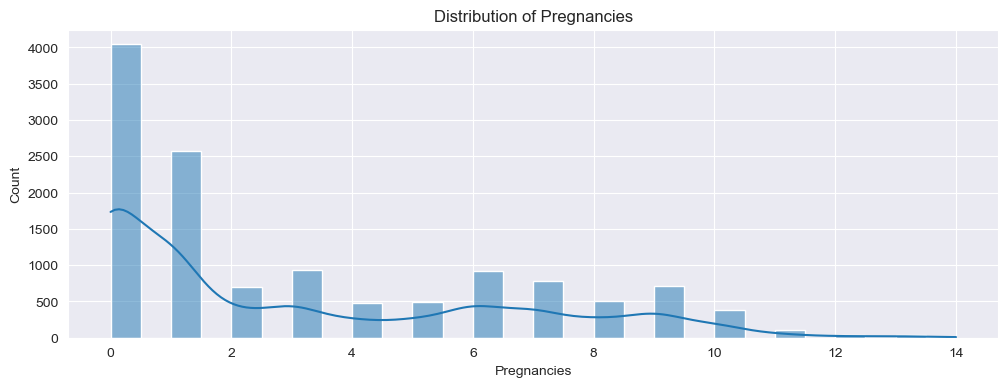

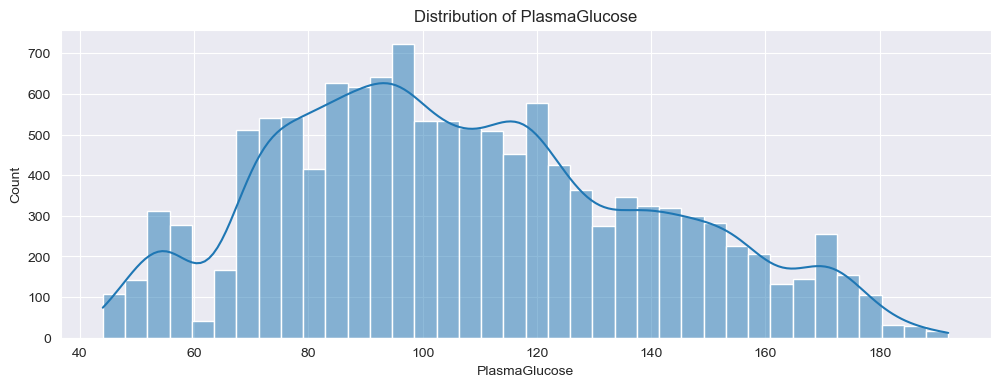

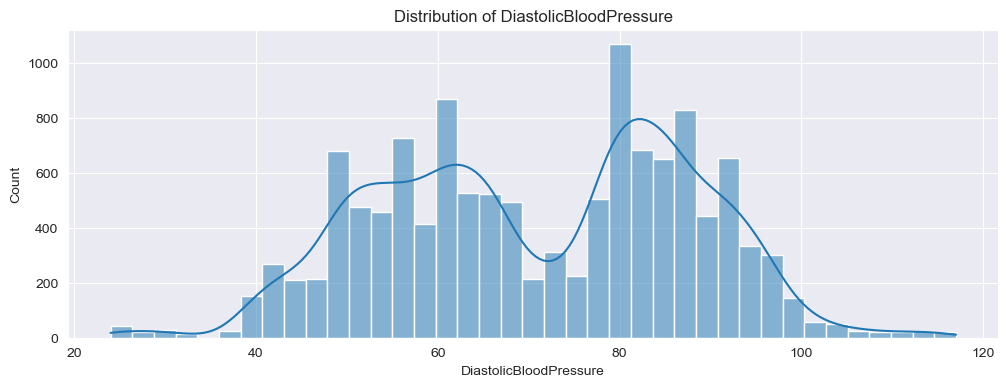

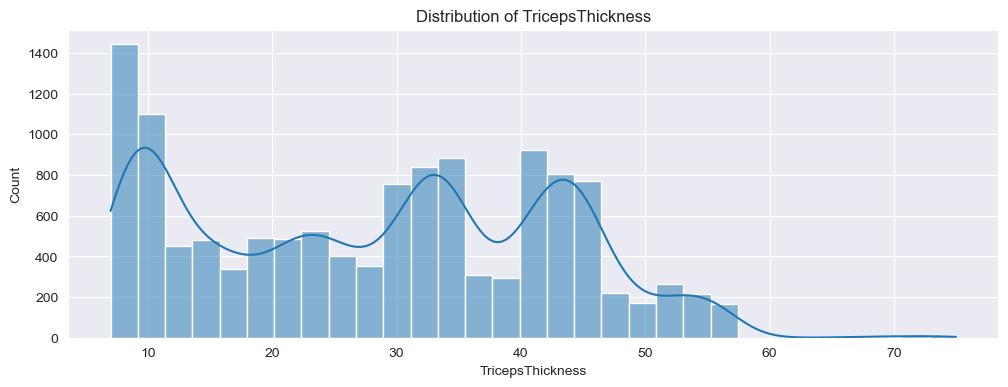

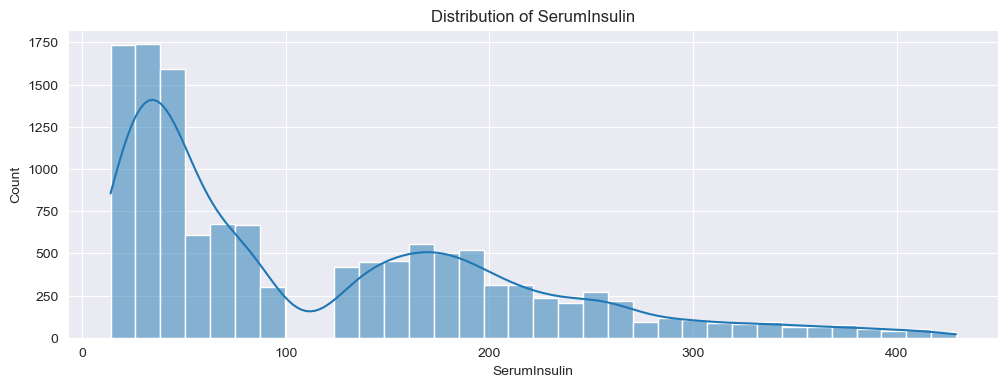

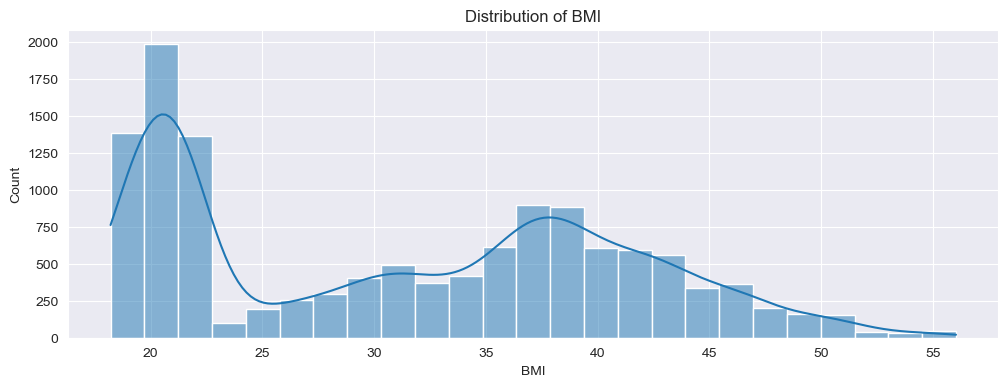

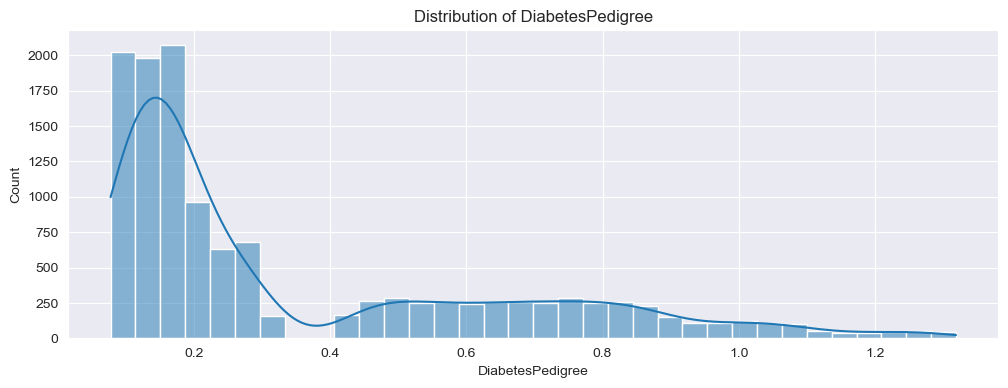

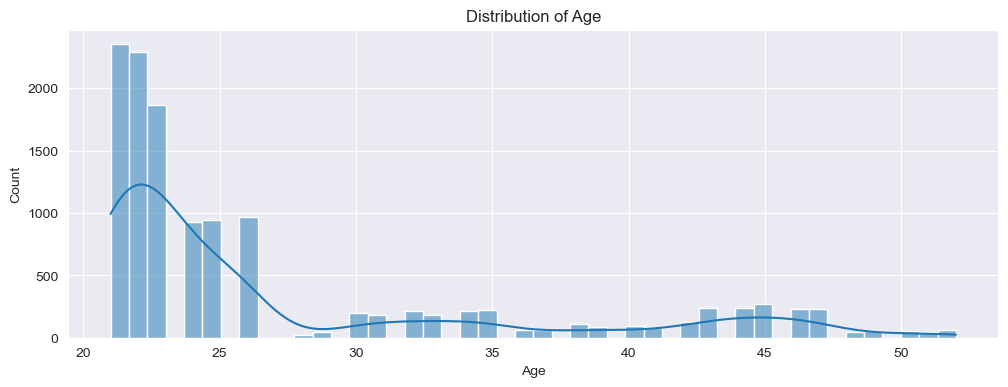

In [10]:
# Distribution plots
for col in numerical_columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

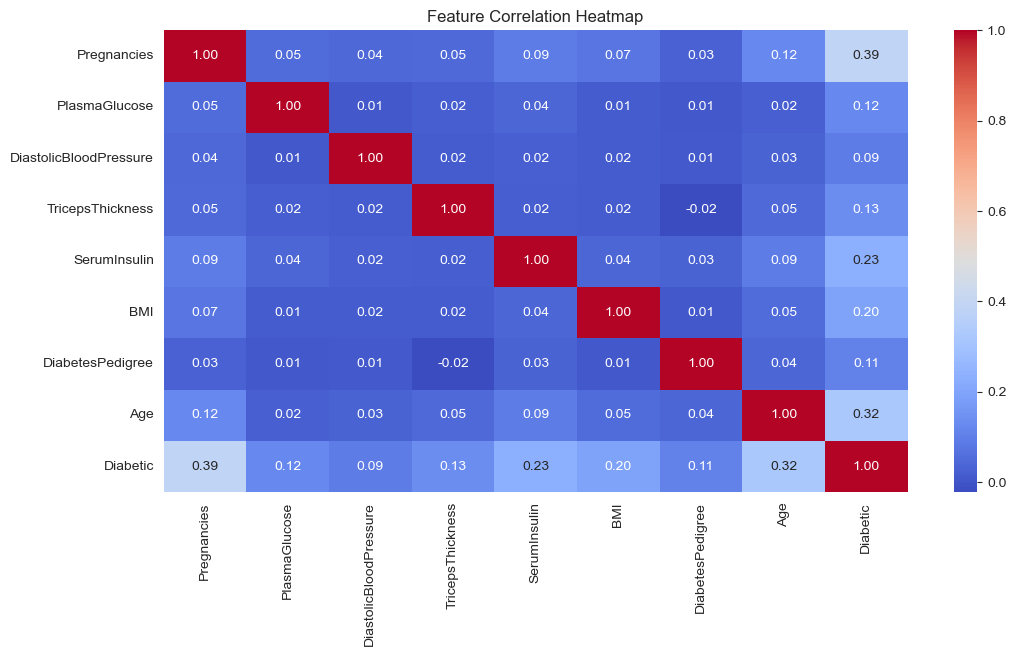

In [11]:
# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

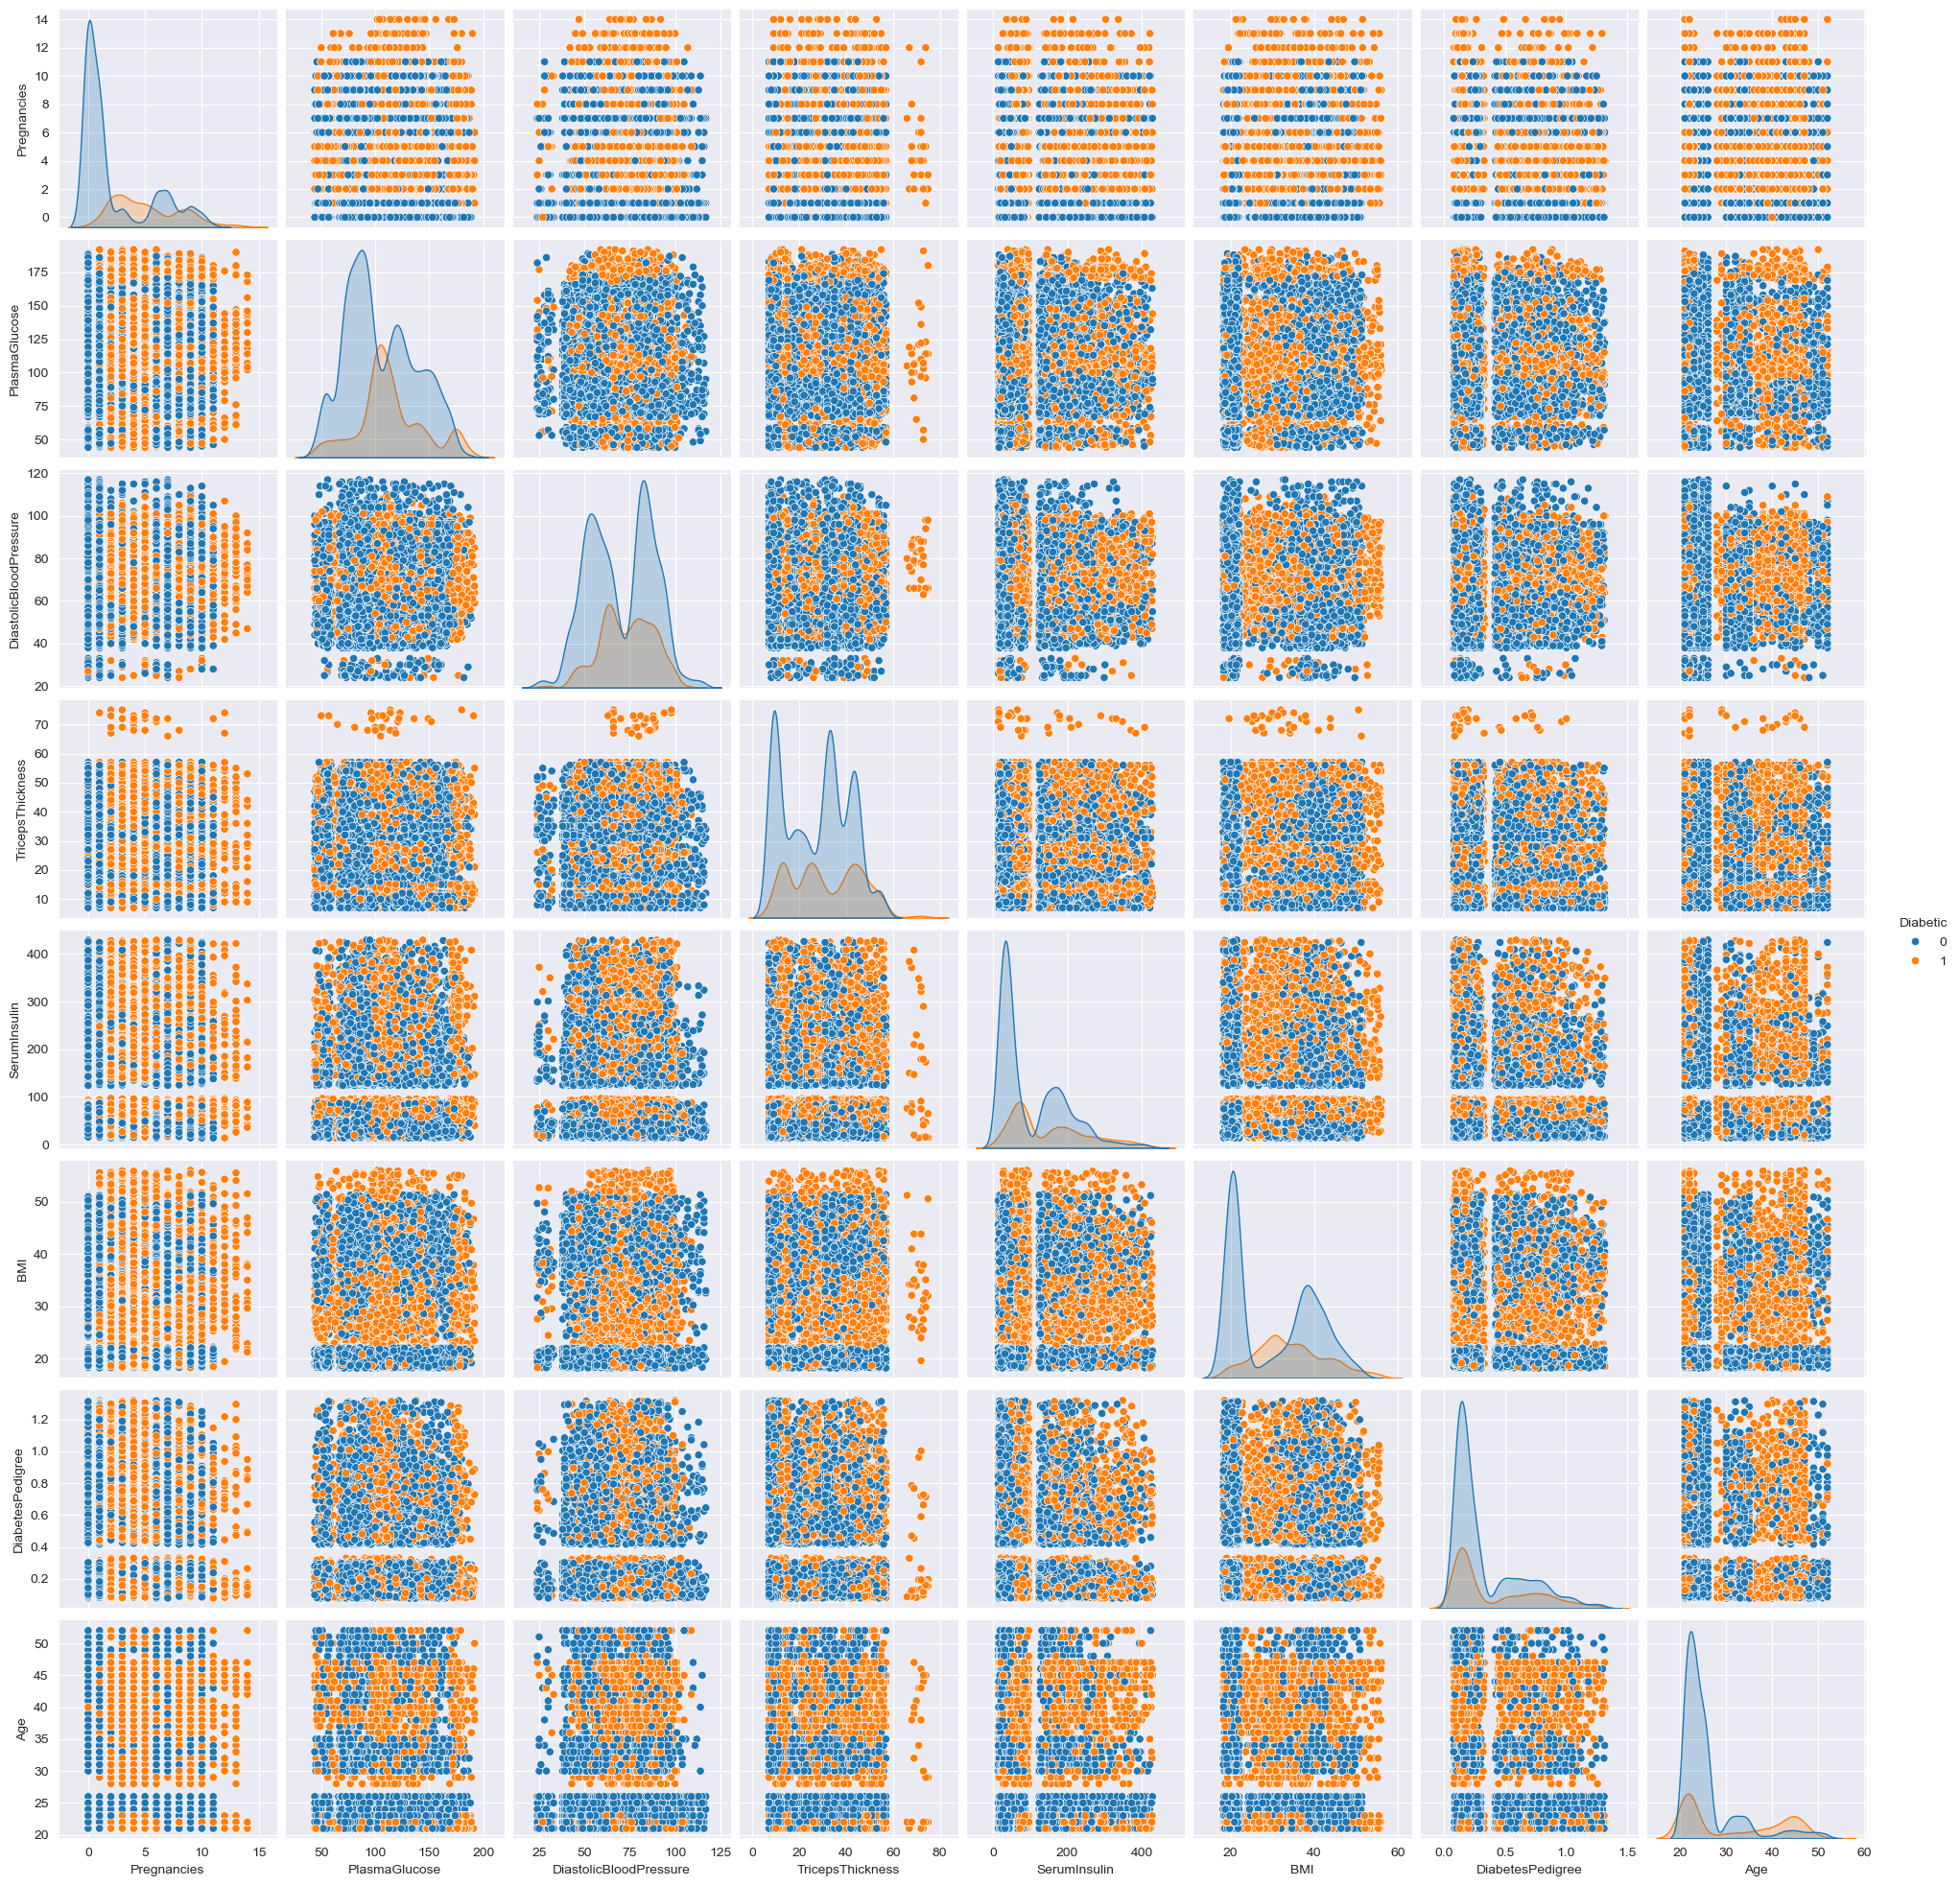

In [12]:
# Pairplot for feature relationships
sns.pairplot(df, hue="Diabetic", diag_kind="kde")
plt.show()

## Preprocessing, Split features and target variable

In [13]:
# Scale numerical features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Diabetic', axis=1))
X = pd.DataFrame(scaled_features, columns=numerical_columns)
y = df['Diabetic']

In [14]:
#X, y = df.drop(['Diabetic', 'PatientID'], axis=1), df['Diabetic']

In [15]:
X.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0    -0.907192       1.986528                0.533167          0.394078   
1     1.472634      -0.480069                1.301946          1.305563   
2     1.175156       0.238054               -1.418351          1.656134   
3     1.770112      -0.136619                0.414893         -0.236950   
4    -0.609713      -0.698629               -0.708708         -0.096721   

   SerumInsulin       BMI  DiabetesPedigree       Age  
0     -0.965577  1.244288          2.852561 -0.766266  
1     -0.830508 -1.015522         -0.652114 -0.522270  
2     -0.840897  1.041516         -0.915744 -0.522270  
3      1.954008 -0.169039          3.084069  1.917689  
4     -0.840897  1.152432          0.647576 -0.644268

In [16]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

## MODEL: Model Development, Training and Evaluation

In [17]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
### Regularization rate === Useful for classifction problems... read on them...

In [19]:
reg = 0.01
LoR = LogisticRegression(C=1/reg,solver='liblinear')

In [20]:
LoR.fit(X_train,y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [21]:
# Logistic Regression
LoR = LogisticRegression(C=1/reg,solver='liblinear')
LoR.fit(X_train,y_train)
pred = LoR.predict(X_test)

recall = recall_score(y_test,pred)
precision = precision_score(y_test,pred)
accuracy = accuracy_score(y_test,pred)

print('Model ', LoR)
print('Recall ', recall)
print('Precision ', precision)
print('Accuracy ', accuracy)

Model  LogisticRegression(C=100.0, solver='liblinear')
Recall  0.5222551928783383
Precision  0.6730401529636711
Accuracy  0.8062106918238994


In [22]:
print('Predicted labels ', pred)
print('Actual labels ', y_test)

Predicted labels  [0 0 0 ... 0 0 0]
Actual labels  6410     0
4740     0
5338     0
5706     0
776      0
        ..
9361     0
2813     1
7593     0
11450    0
10637    1
Name: Diabetic, Length: 2544, dtype: int64


In [23]:
#TEST ON A NEW DATASET
#LoR.predict[[25,	171,	80,	34,	1,	32.1,	0.334,	25]]

In [24]:
#TEST ON A NEW DATASET
#LoR.predict[[9,	138,	68,	39,	1,	32.1,	0.334,	40]]

In [25]:
data = pd.DataFrame(y_test)
data[' Prediction'] = pred
data.columns = ['Actuals', 'Predictions']
data.head()

Actuals  Predictions
6410        0            0
4740        0            0
5338        0            0
5706        0            0
776         0            0

In [26]:
data.shape

(2544, 2)

#### Confusion Matrix: A diagram showing How many predicted well and how many not predicted well

In [27]:
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[1699,  171],
       [ 322,  352]], dtype=int64)

In [28]:
## EVALUATION OF MODEL PERFORMANCE:
#Metrics used to check the performance of a classification model

In [29]:
### They are;
#### Accuracy: (TP+TN)/(TP + TN +FP +FN)
#### Recall: TP/(TP + FN) 
#### Precision: TP/(TP + FP)

In [30]:
## y([[1744=TP,  273=FP],
##     [ 394=FN,  589=TN]]

In [31]:
# 1744/(1744+394), 1744/(1744+273), (1744+589)/(1744+589+273+394)

In [32]:
# Decision Tree
dtC = DecisionTreeClassifier(max_depth=5, random_state=42)

dtC.fit(X_train,y_train)

pred1 = dtC.predict(X_test)

recall = recall_score(y_test,pred1)
precision = precision_score(y_test,pred1)
accuracy = accuracy_score(y_test,pred1)

print('Model ', dtC)
print('Recall ', recall)
print('Precision ', precision)
print('Accuracy ', accuracy)

Model  DecisionTreeClassifier(max_depth=5, random_state=42)
Recall  0.814540059347181
Precision  0.7689075630252101
Accuracy  0.8860062893081762


In [33]:
print('Predicted labels ', pred)
print('Actual labels ', y_test)

Predicted labels  [0 0 0 ... 0 0 0]
Actual labels  6410     0
4740     0
5338     0
5706     0
776      0
        ..
9361     0
2813     1
7593     0
11450    0
10637    1
Name: Diabetic, Length: 2544, dtype: int64


In [34]:
#TEST ON A NEW DATASET
#dtC.predict[[25,	171,	80,	34,	1,	32.1,	0.334,	25]]

In [35]:
# Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

RFC.fit(X_train,y_train)

pred1 = RFC.predict(X_test)

recall = recall_score(y_test,pred1)
precision = precision_score(y_test,pred1)
accuracy = accuracy_score(y_test,pred1)

print('Model ', RFC)
print('Recall ', recall)
print('Precision ', precision)
print('Accuracy ', accuracy)

Model  RandomForestClassifier(random_state=42)
Recall  0.8620178041543026
Precision  0.9035769828926905
Accuracy  0.9390723270440252


In [36]:
print('Predicted labels ', pred)
print('Actual labels ', y_test)

Predicted labels  [0 0 0 ... 0 0 0]
Actual labels  6410     0
4740     0
5338     0
5706     0
776      0
        ..
9361     0
2813     1
7593     0
11450    0
10637    1
Name: Diabetic, Length: 2544, dtype: int64


In [37]:
#TEST ON A NEW DATASET
#dtC.predict[[25,	171,	80,	34,	1,	32.1,	0.334,	25]]

In [38]:
# XGBoost
XGB = XGBClassifier(eval_metric='logloss', random_state=42)

XGB.fit(X_train,y_train)

pred1 = XGB.predict(X_test)

recall = recall_score(y_test,pred1)
precision = precision_score(y_test,pred1)
accuracy = accuracy_score(y_test,pred1)

print('Model ', XGB)
print('Recall ', recall)
print('Precision ', precision)
print('Accuracy ', accuracy)

Model  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)
Recall  0.900593471810089
Precision  0.9155354449472096
Accuracy  0.9516509433962265


In [39]:
print('Predicted labels ', pred)
print('Actual labels ', y_test)

Predicted labels  [0 0 0 ... 0 0 0]
Actual labels  6410     0
4740     0
5338     0
5706     0
776      0
        ..
9361     0
2813     1
7593     0
11450    0
10637    1
Name: Diabetic, Length: 2544, dtype: int64


In [40]:
#TEST ON A NEW DATASET
#dtC.predict[[25,	171,	80,	34,	1,	32.1,	0.334,	25]]

In [41]:
# Logistic Regression
log_reg = LogisticRegression(C=1/0.01, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate Models
models = {'Logistic Regression': y_pred_log, 'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf, 'XGBoost': y_pred_xgb}
for name, y_pred in models.items():
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


Logistic Regression:
Accuracy: 0.8062106918238994
Recall: 0.5222551928783383
Precision: 0.6730401529636711
Confusion Matrix:
 [[1699  171]
 [ 322  352]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1870
           1       0.67      0.52      0.59       674

    accuracy                           0.81      2544
   macro avg       0.76      0.72      0.73      2544
weighted avg       0.80      0.81      0.80      2544


Decision Tree:
Accuracy: 0.8860062893081762
Recall: 0.814540059347181
Precision: 0.7689075630252101
Confusion Matrix:
 [[1705  165]
 [ 125  549]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1870
           1       0.77      0.81      0.79       674

    accuracy                           0.89      2544
   macro avg       0.85      0.86      0.86      2544
weighted avg       0.89      0.89      0.89      2544


Random Forest:
Accuracy: 0.9390723270440252


### Hyperparameter Tuning

The best performing model is the XGBoost, hence we tune it

In [42]:
# Tuning XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid, scoring='accuracy', cv=3)
xgb_grid_search.fit(X_train, y_train)
best_model = xgb_grid_search.best_estimator_
print("Best Parameters:", xgb_grid_search.best_params_)

# Evaluate Best Model
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Tuned Model Accuracy: 0.9634433962264151


## INTERPRET: Insights and Deployment

### Saving the model

In [43]:
# Save the trained KMeans and classifier model
joblib.dump(best_model, 'xgb_model.pkl')
print("Model saved as 'xgb_model.pkl'.")

Model saved as 'xgb_model.pkl'.


In [44]:
# Load the saved model
XGB_mod = joblib.load('xgb_model.pkl')
print("Model is loaded as 'xgb_model.pkl'.")

Model is loaded as 'xgb_model.pkl'.


In [45]:
# Test the saved model
sample_input = [[25, 171, 80, 34, 1, 32.1, 0.334, 25]]
print("Prediction for sample input:", XGB_mod.predict(sample_input))

Prediction for sample input: [1]


### Feature Importance Visualization:

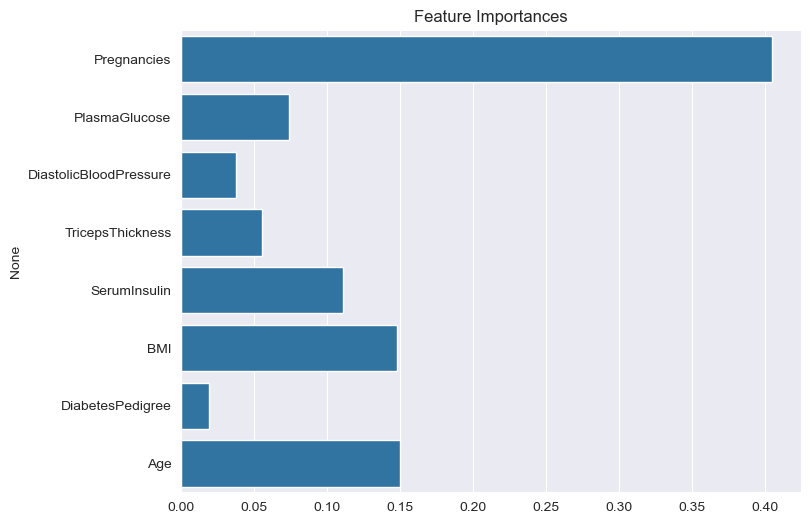

In [46]:
# Feature importance for XGBoost
importance = best_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=importance, y=numerical_columns)
plt.title("Feature Importances")
plt.show()